![title](https://github.com/pedroosorio98/PyFinLib/blob/main/Media/PyFinLib%20Logo.PNG?raw=true)

## PyFinLib - Python for Finance Library

- PyFinLib is being designed to become in the future a library dedicated to the use and implementation of financial tools such as portfolio optimization methods (Markowitz Frontier, Black Litterman, Maximum Sharpe Ratio, Minimum Variance, Risk Parity, Equally Weighted etc), risk metrics (Volatility, Underwater, Maximum Drawdown, Value at Risk, Conditional Value at Risk etc), financial data (Famma & French data, Yahoo Finance data, Quandl data etc) and backtesting tools. **This notebook introduces how to use the main available tools.**

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing PyFin:

In [343]:
import PyFinLib as pf
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Importing equities data:

In [344]:
tickers = ["BOVA11.SA","SMAL11.SA","USDBRL=X"]
equities = pf.get_yf_prices(tickers,start_date="2008-12-02")

#### Importing brazilian bonds indices:

In [345]:
imab = pf.get_imab_bcb(start_date="2008-12-02")
imag = pf.get_imag_bcb(start_date="2008-12-02")

#### Importing brazilian CDI data:

In [346]:
cdi = pf.get_cdi_bcb(start_date="2008-12-02")

In [347]:
data = pd.concat([equities,imab,imag],axis=1).fillna(method="ffill")
rets = data.pct_change(1)

#### Performance of each asset:

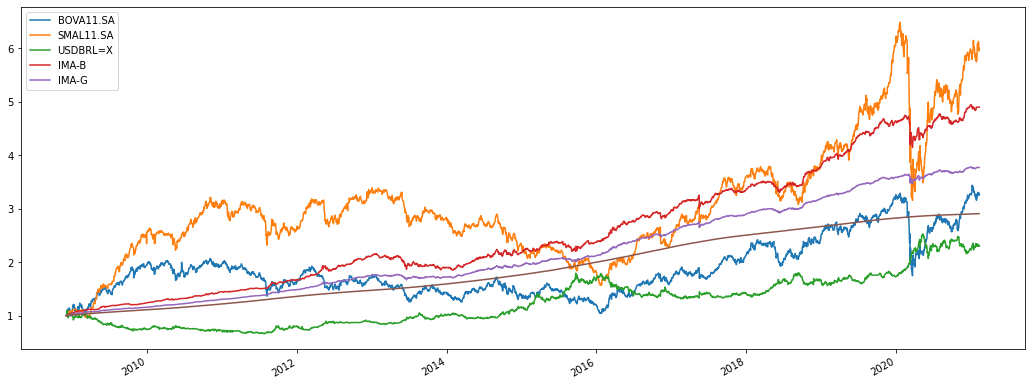

In [348]:
pf.performance_index(rets).plot(figsize=(18,7))
plt.plot(pf.performance_index(cdi))
plt.legend();

##### Annualized returns:

In [349]:
rets.dropna(inplace=True)

In [350]:
pf.annualized_rets(rets)

BOVA11.SA    0.102643
SMAL11.SA    0.158470
USDBRL=X     0.070965
IMA-B        0.139423
IMA-G        0.115197
dtype: float64

#### Annualized volatility:

In [351]:
pf.annualized_vol(rets)

BOVA11.SA    0.262108
SMAL11.SA    0.244548
USDBRL=X     0.175358
IMA-B        0.075005
IMA-G        0.035319
dtype: float64

#### Sharpe Ratio:

In [352]:
pf.sharpe_ratio(rets,rf=pf.annualized_rets(cdi["CDI"]).round(3))

BOVA11.SA    0.040607
SMAL11.SA    0.271809
USDBRL=X    -0.119956
IMA-B        0.632260
IMA-G        0.656774
dtype: float64

#### Underwater:

In [353]:
pf.underwater(rets)

,BOVA11.SA,SMAL11.SA,USDBRL=X,IMA-B,IMA-G
2008-12-03,0.000000,0.000000,0.000000,0.000000,0.000000
2008-12-04,-0.004865,0.000000,0.000000,0.000000,0.000000
2008-12-05,0.000000,0.000000,0.000000,0.000000,0.000000
2008-12-08,0.000000,0.000000,-0.021434,0.000000,0.000000
2008-12-09,-0.008219,-0.003775,-0.051247,-0.000319,-0.000217
...,...,...,...,...,...
2021-02-08,-0.046013,-0.055283,-0.087864,-0.008939,-0.002722
2021-02-09,-0.043355,-0.062849,-0.088696,-0.008939,-0.002722
2021-02-10,-0.054817,-0.082890,-0.086589,-0.008939,-0.002722
2021-02-11,-0.048671,-0.076074,-0.085196,-0.008939,-0.002722


#### Plot Underwater:

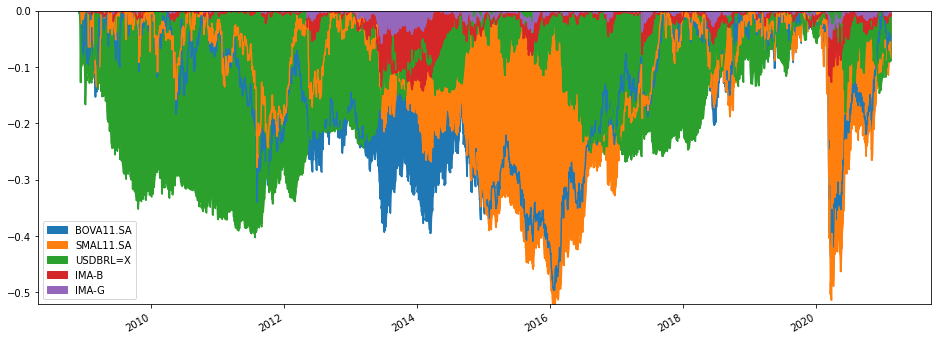

In [354]:
pf.plot_underwater(rets)

#### Maximum Drawdown: 

In [355]:
pf.max_drawdown(rets)

BOVA11.SA   -0.496547
SMAL11.SA   -0.537549
USDBRL=X    -0.402299
IMA-B       -0.141791
IMA-G       -0.057773
dtype: float64

#### Historical VaR:

In [356]:
pf.historical_var(rets,pct=0.01)

BOVA11.SA   -0.040832
SMAL11.SA   -0.040207
USDBRL=X    -0.029627
IMA-B       -0.012817
IMA-G       -0.005973
dtype: float64

#### Historical CVaR:

In [357]:
pf.historical_cvar(rets,pct=0.01)

BOVA11.SA   -0.036626
SMAL11.SA   -0.035393
USDBRL=X    -0.025500
IMA-B       -0.010949
IMA-G       -0.005058
dtype: float64

#### Gaussian VaR:

In [358]:
pf.gaussian_var(rets,pct=0.01)

BOVA11.SA   -0.037880
SMAL11.SA   -0.035128
USDBRL=X    -0.025361
IMA-B       -0.010461
IMA-G       -0.004740
dtype: float64

#### Modified gaussian VaR:

In [359]:
pf.modified_var(rets,pct=0.01)

BOVA11.SA   -0.075383
SMAL11.SA   -0.093010
USDBRL=X    -0.035493
IMA-B       -0.054933
IMA-G       -0.024491
dtype: float64

#### Normality - Check normality of returns:

In [360]:
pf.normality(rets)

BOVA11.SA    False
SMAL11.SA    False
USDBRL=X     False
IMA-B        False
IMA-G        False
dtype: bool

#### Kurtosis:

In [361]:
pf.kurtosis(rets)

BOVA11.SA    11.817146
SMAL11.SA    17.541040
USDBRL=X      7.417405
IMA-B        42.805179
IMA-G        41.294516
dtype: float64

#### Skewness:

In [362]:
pf.skewness(rets)

BOVA11.SA   -0.348197
SMAL11.SA   -0.933717
USDBRL=X     0.146016
IMA-B       -1.793775
IMA-G       -2.049777
dtype: float64

#### Summary statistics:

In [363]:
rets.dropna(inplace=True)
pf.main_stats(rets,rf=pf.annualized_rets(cdi["CDI"]).round(3))

,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=0.092),Maximum Drawdown,Historical VaR (5.0%),Historical CVaR (5.0%),Gaussian VaR (5.0%),Modified VaR (5.0%),Kurtosis,Skewness,Normality
BOVA11.SA,0.102643,0.262108,0.040607,-0.496547,-0.024182,-0.036626,-0.026629,-0.025288,11.817146,-0.348197,False
SMAL11.SA,0.158470,0.244548,0.271809,-0.537549,-0.020925,-0.035393,-0.024631,-0.023947,17.541040,-0.933717,False
USDBRL=X,0.070965,0.175358,-0.119956,-0.402299,-0.017011,-0.025500,-0.017834,-0.016386,7.417405,0.146016,False
IMA-B,0.139423,0.075005,0.632260,-0.141791,-0.005727,-0.010949,-0.007241,-0.005570,42.805179,-1.793775,False
IMA-G,0.115197,0.035319,0.656774,-0.057773,-0.002577,-0.005058,-0.003224,-0.002625,41.294516,-2.049777,False


#### MInimize vol for a given return:

In [364]:
cov_matrix = rets.cov()
expected_returns = pf.annualized_rets(rets)

In [365]:
weights_target_145 = pf.target_ret_min_vol(cov_matrix,expected_returns,target=0.145)
pd.DataFrame(weights_target_145*100,index=cov_matrix.index,columns=["Weights"]).round(2)

,Weights
BOVA11.SA,0.00
SMAL11.SA,29.28
USDBRL=X,0.00
IMA-B,70.72
IMA-G,0.00


#### Monte Carlos Simulation Minimum Variance Frontier:

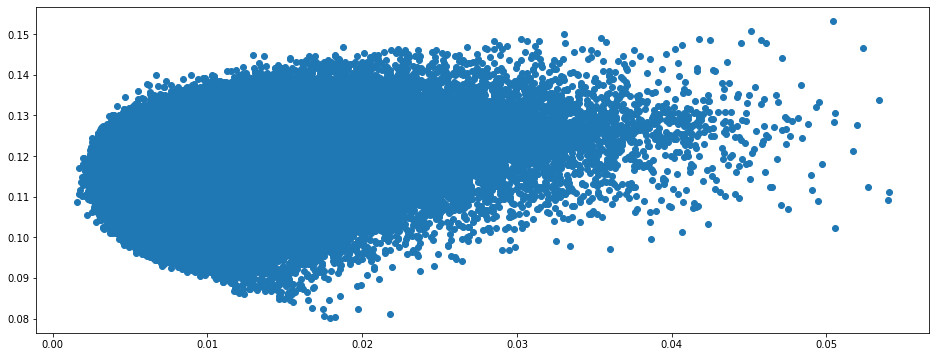

In [366]:
pf.plot_montecarlo_ef(cov_matrix,expected_returns,n_simulations=100000)

#### Optimized Minimum Variance Frontier:

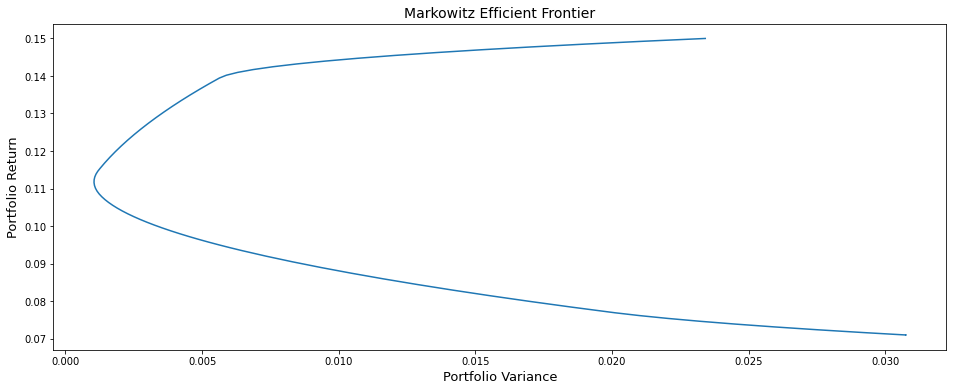

In [367]:
cov_matrix = rets.cov()
target_returns = np.linspace(0,0.15,200)
expected_returns = pf.annualized_rets(rets)
pf.plot_markowitz_ef(target_returns,cov_matrix,expected_returns)

#### Maximum Sharpe Ratio (MSR) Portfolio:

In [368]:
msr_weights = pf.msr_portfolio_weights(cov_matrix,expected_returns, rf=pf.annualized_rets(cdi["CDI"]))
pd.DataFrame(msr_weights*100,index=cov_matrix.index,columns=["Weights"]).round(2)

,Weights
BOVA11.SA,0.00
SMAL11.SA,0.09
USDBRL=X,1.03
IMA-B,0.00
IMA-G,98.88


##### Portfolio stats:

In [369]:
msr_stats = pf.portfolio_annualized_stats(msr_weights,cov_matrix,expected_returns,rf=pf.annualized_rets(cdi["CDI"]),name="MSR")
msr_stats

,Annualized Return,Annualized Volatility,Sharpe Ratio
MSR,0.114778,0.034643,0.662453


#### Global Minimum Variance Portfolio (GMV):

In [370]:
gmv_weights = pf.gmv_portfolio_weights(cov_matrix)
pd.DataFrame(gmv_weights*100,index=cov_matrix.index,columns=["Weights"]).round(2)

,Weights
BOVA11.SA,0.00
SMAL11.SA,0.00
USDBRL=X,7.71
IMA-B,0.00
IMA-G,92.29


##### Portfolio stats:

In [371]:
gmv_stats = pf.portfolio_annualized_stats(gmv_weights,cov_matrix,expected_returns,rf=pf.annualized_rets(cdi["CDI"]),name="GMV")
gmv_stats

,Annualized Return,Annualized Volatility,Sharpe Ratio
GMV,0.111786,0.032308,0.617721


#### Equally Weighted (EW) Portfolio:

In [372]:
ew_weights = pf.ew_weights(expected_returns.shape[0])
pd.DataFrame(ew_weights*100,index=cov_matrix.index,columns=["Weights"]).round(2)

,Weights
BOVA11.SA,20.0
SMAL11.SA,20.0
USDBRL=X,20.0
IMA-B,20.0
IMA-G,20.0


##### Portfolio stats:

In [373]:
ew_stats = pf.portfolio_annualized_stats(ew_weights,cov_matrix,expected_returns,rf=pf.annualized_rets(cdi["CDI"]),name="EW")
ew_stats

,Annualized Return,Annualized Volatility,Sharpe Ratio
EW,0.11734,0.103905,0.245518


#### Risk Parity (RP) Portfolio:

In [374]:
rp_weights = pf.rp_portfolio_weights(cov_matrix)
pd.DataFrame(rp_weights*100,index=cov_matrix.index,columns=["Weights"]).round(2)

,Weights
BOVA11.SA,6.51
SMAL11.SA,6.97
USDBRL=X,18.83
IMA-B,21.41
IMA-G,46.27


##### Portfolio stats:

In [375]:
rp_stats = pf.portfolio_annualized_stats(rp_weights,cov_matrix,expected_returns,rf=pf.annualized_rets(cdi["CDI"]),name="RP")
rp_stats

,Annualized Return,Annualized Volatility,Sharpe Ratio
RP,0.114251,0.055867,0.40135


##### Contribution to risk of each asset in the RP Portfolio:

In [376]:
pd.DataFrame(pf.contribution_to_risk(rp_weights,cov_matrix)*100,columns=["Risk Contribution"]).round(2)

,Risk Contribution
BOVA11.SA,19.99
SMAL11.SA,19.98
USDBRL=X,20.02
IMA-B,20.00
IMA-G,20.02


#### Portfolio Comparison: 

In [377]:
portfolios_stats = pd.concat([ew_stats,gmv_stats,msr_stats,rp_stats],axis=0)
portfolios_stats

,Annualized Return,Annualized Volatility,Sharpe Ratio
EW,0.117340,0.103905,0.245518
GMV,0.111786,0.032308,0.617721
MSR,0.114778,0.034643,0.662453
RP,0.114251,0.055867,0.401350


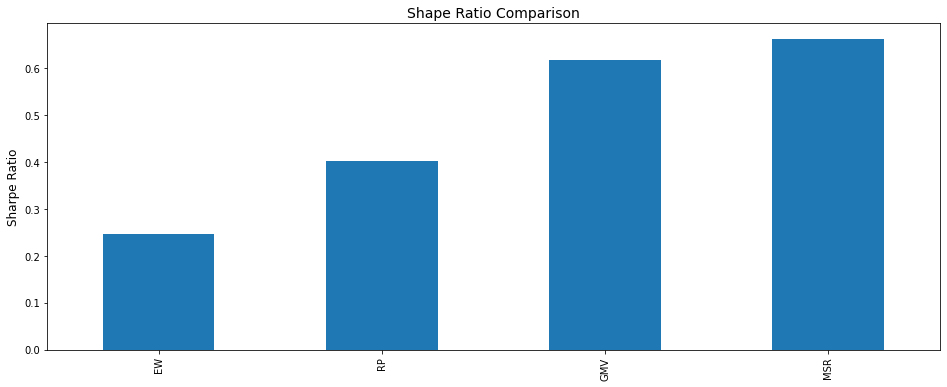

In [378]:
portfolios_stats["Sharpe Ratio"].sort_values().plot.bar(figsize=(16,6))
plt.ylabel("Sharpe Ratio",fontsize=12)
plt.title("Shape Ratio Comparison",fontsize=14);

#### In-sample analysis of portfolio performance:

In [379]:
ew_performance = pf.no_reb_strategy(rets,ew_weights)
rp_performance = pf.no_reb_strategy(rets,rp_weights)
msr_performance = pf.no_reb_strategy(rets,msr_weights)
gmv_performance = pf.no_reb_strategy(rets,gmv_weights)

df_portfolios = pd.concat([ew_performance,rp_performance,msr_performance,gmv_performance],axis=1)
df_portfolios.columns =["EW","RP","MSR","GMV"]
df_portfolios_rets = df_portfolios.pct_change().dropna()
df_portfolios

,EW,RP,MSR,GMV
2008-12-03,1.000000,1.000000,1.000000,1.000000
2008-12-04,1.008613,1.007858,1.001209,1.003575
2008-12-05,1.025181,1.022546,1.005105,1.011093
2008-12-08,1.045738,1.027555,1.006350,1.010642
2008-12-09,1.036526,1.020383,1.005796,1.007926
...,...,...,...,...
2021-02-08,4.077151,3.865268,3.754778,3.653922
2021-02-09,4.068647,3.862014,3.754714,3.653761
2021-02-10,4.035665,3.851322,3.754656,3.654168
2021-02-11,4.049476,3.856455,3.754730,3.654438


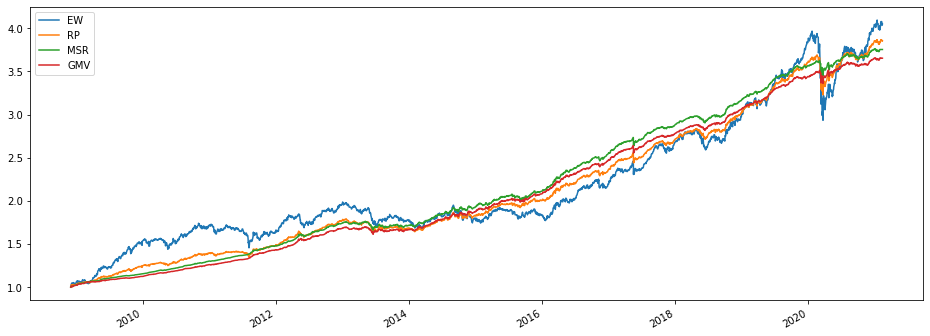

In [380]:
df_portfolios.plot(figsize=(16,6));

##### Portfolios stats:

In [381]:
pf.main_stats(df_portfolios_rets,rf=pf.annualized_rets(cdi["CDI"]))

,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=0.09182907308404697),Maximum Drawdown,Historical VaR (5.0%),Historical CVaR (5.0%),Gaussian VaR (5.0%),Modified VaR (5.0%),Kurtosis,Skewness,Normality
EW,0.121776,0.114765,0.260941,-0.260462,-0.009973,-0.016517,-0.011407,-0.011395,16.973096,-1.060472,False
RP,0.117235,0.059543,0.426674,-0.125661,-0.004956,-0.008506,-0.005722,-0.005445,24.231562,-1.372758,False
MSR,0.114793,0.034941,0.657214,-0.057011,-0.002588,-0.004996,-0.003186,-0.002609,41.066811,-2.059868,False
GMV,0.112302,0.032905,0.622198,-0.051213,-0.002421,-0.004614,-0.002984,-0.002608,35.013842,-1.863451,False


#### Yearly Returns:

In [382]:
pf.rets_yearly_returns(df_portfolios_rets)

,EW,RP,MSR,GMV
2008,4.35,2.91,2.37,2.14
2009,46.79,21.08,12.63,10.05
2010,11.96,12.05,12.89,12.14
2011,-4.77,6.08,13.58,13.57
2012,19.87,19.49,17.70,17.35
2013,-9.04,-4.86,-1.37,-0.80
2014,1.16,8.88,12.34,12.51
2015,1.91,9.30,9.49,10.92
2016,19.62,17.65,20.71,18.79
2017,21.47,14.74,12.78,12.30


#### NEFIN Data (2001-01-02 to 2021-01-29):

In [383]:
pf.get_nefin_data()

,WML,HML,SMB,Rf,Rm-Rf
2001-01-02,-0.006308,0.065490,0.000524,0.000579,0.006601
2001-01-03,-0.028644,0.009390,0.005390,0.000577,0.062427
2001-01-04,-0.000946,-0.002327,0.006690,0.000574,-0.000310
2001-01-05,0.005985,-0.002397,0.003523,0.000573,-0.012839
2001-01-08,-0.004099,0.001948,0.007883,0.000573,0.003982
...,...,...,...,...,...
2021-01-22,0.004737,0.000523,-0.006062,0.000075,-0.009704
2021-01-26,-0.000980,-0.012009,-0.002526,0.000075,-0.009102
2021-01-27,-0.020807,0.010859,0.004380,0.000075,-0.005954
2021-01-28,-0.018209,0.003190,0.003113,0.000075,0.023221


#### Famma & French Data Names:

In [384]:
pf.get_fammafrench_names()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

#### Famma & French Data: 

In [385]:
pf.get_fammafrench_data('Portfolios_Formed_on_ME')

{0:           <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  \
 Date                                                                      
 2016-02 -99.99  -0.07    1.29  -0.15  -0.59   0.41   1.63   0.88  -0.21   
 2016-03 -99.99   7.16    8.24   6.64   6.64   8.18   8.23   8.33   6.48   
 2016-04 -99.99   3.43    1.63   0.56   3.57   2.23   1.69   1.75   0.45   
 2016-05 -99.99   1.33    1.78   1.77   0.03   2.22   1.18   2.72   1.67   
 2016-06 -99.99   0.19   -0.69  -0.05  -0.45  -0.24  -0.55  -1.19   0.08   
 2016-07 -99.99   6.08    5.30   3.75   5.42   6.72   5.73   4.53   3.68   
 2016-08 -99.99   2.29    1.25   0.34   3.69   2.24   1.68   1.23   0.19   
 2016-09 -99.99   3.48    0.59   0.12   4.11   2.21   0.58   0.06   0.13   
 2016-10 -99.99  -5.90   -4.13  -1.64  -6.27  -6.31  -4.05  -2.16  -1.65   
 2016-11 -99.99  12.45   10.02   3.86  12.53  12.60  10.08   6.96   3.70   
 2016-12 -99.99   3.54    1.30   1.87   4.45   1.75   1.57   0.59   2.01   
 2017-01 

#### Equally Weighted Portfolio:

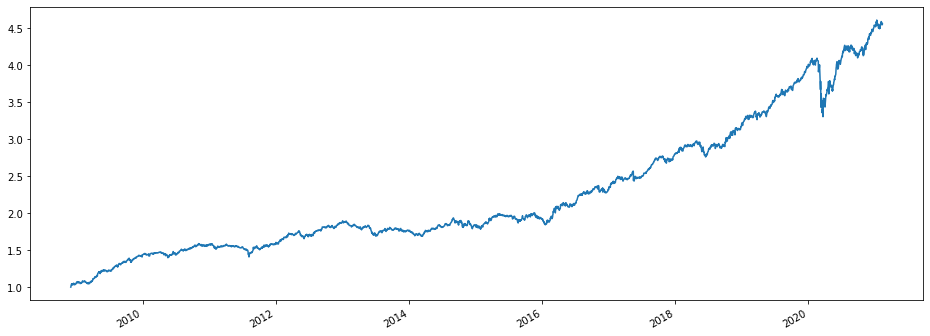

In [386]:
ew_weighted_weights = pf.ew_weighted_weights(rets,reb_days=30,leverage=1)
ew_weighted_returns = pf.strategy_returns(rets,ew_weighted_weights)
ew_performance = pf.performance_index(ew_weighted_returns)
ew_performance.plot(figsize=(16,6));

##### Plot Weights:

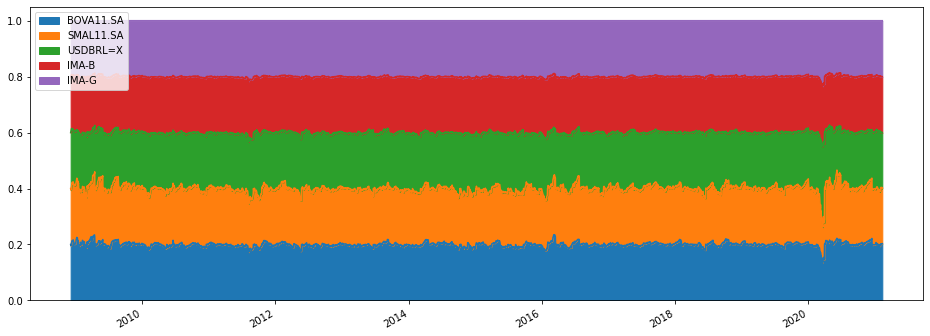

In [387]:
pf.plot_weights(ew_weighted_weights)

##### Portfolio stats:

In [388]:
pf.main_stats(ew_weighted_returns)

,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=0),Maximum Drawdown,Historical VaR (5.0%),Historical CVaR (5.0%),Gaussian VaR (5.0%),Modified VaR (5.0%),Kurtosis,Skewness,Normality
stats,0.132639,0.100521,1.319525,-0.193281,-0.008946,-0.014239,-0.009899,-0.009796,12.591694,-0.651659,False


##### Yearly Returns:

In [389]:
pf.rets_yearly_returns(ew_weighted_returns)

2008     4.35
2009    37.49
2010     9.92
2011     0.32
2012    18.23
2013    -5.50
2014     4.25
2015     4.50
2016    20.50
2017    20.16
2018    13.61
2019    25.15
2020    14.38
2021     0.50
dtype: float64

#### Momentum Weighted Portfolio:

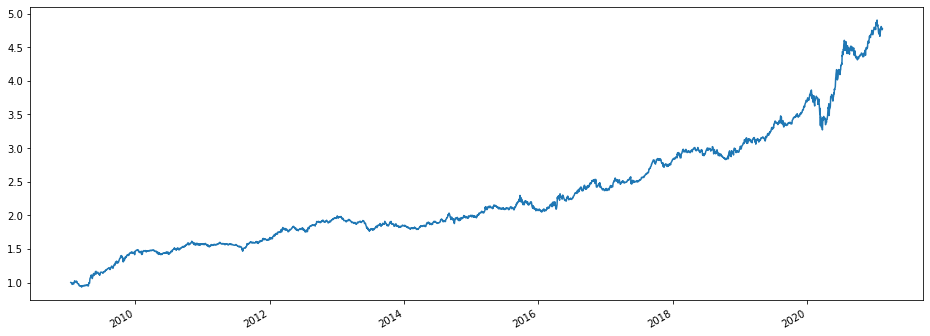

In [390]:
momentum_weighted_weights = pf.momentum_weighted_weights(rets,gamma=10,look_back_days=30,reb_days=30,leverage=1)
momentum_weighted_returns = pf.strategy_returns(rets,momentum_weighted_weights)
momentum_performance = pf.performance_index(momentum_weighted_returns)
momentum_performance.plot(figsize=(16,6));

##### Plot Weights:

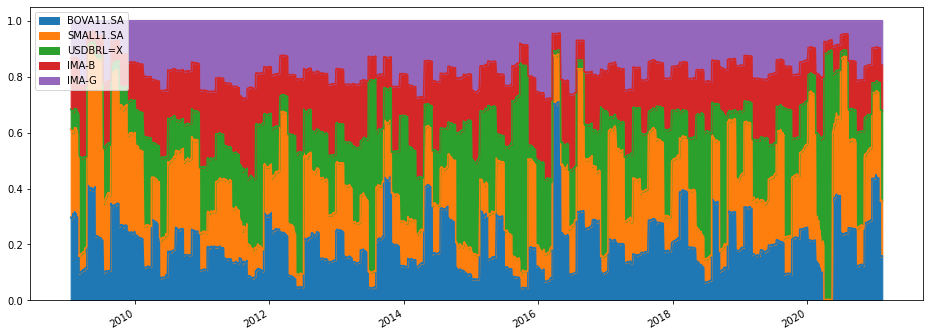

In [391]:
pf.plot_weights(momentum_weighted_weights)

##### Portfolio stats:

In [392]:
pf.main_stats(momentum_weighted_returns)

,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=0),Maximum Drawdown,Historical VaR (5.0%),Historical CVaR (5.0%),Gaussian VaR (5.0%),Modified VaR (5.0%),Kurtosis,Skewness,Normality
stats,0.138341,0.112226,1.232701,-0.153304,-0.010316,-0.016415,-0.011087,-0.010746,7.55184,-0.155086,False


##### Yearly Returns:

In [393]:
pf.rets_yearly_returns(momentum_weighted_returns)

2009    46.21
2010     7.79
2011     4.07
2012    19.53
2013    -5.93
2014     8.48
2015     3.57
2016    15.15
2017    18.23
2018     5.70
2019    23.81
2020    29.89
2021    -0.49
dtype: float64

#### Volatility Weighted Portfolio:

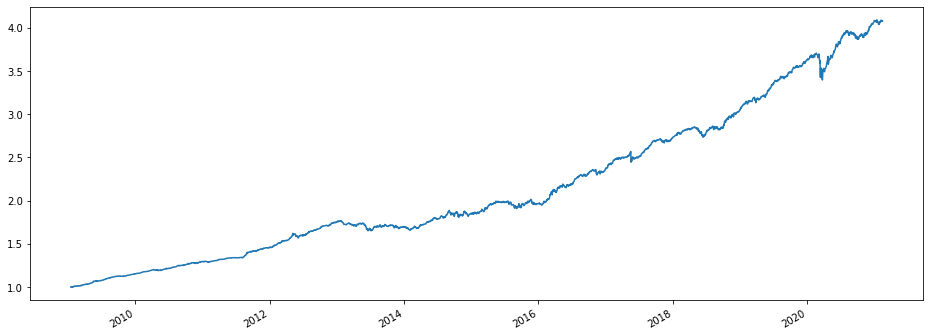

In [394]:
vol_weighted_weights = pf.vol_weighted_weights(rets,look_back_days=30,reb_days=30,leverage=1)
vol_weighted_returns = pf.strategy_returns(rets,vol_weighted_weights)
vol_performance = pf.performance_index(vol_weighted_returns)
vol_performance.plot(figsize=(16,6));

##### Plot Weights:

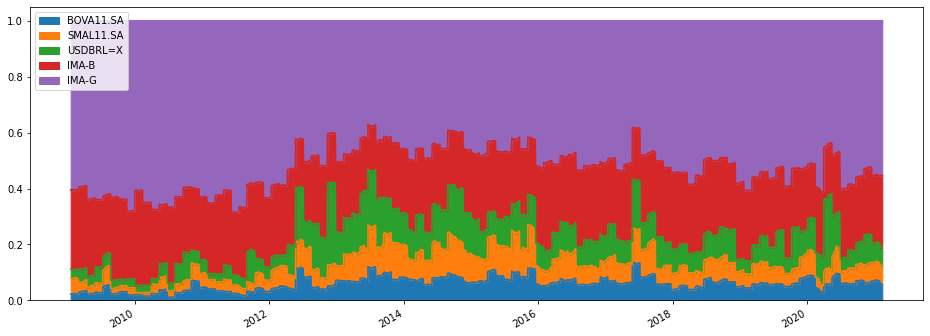

In [395]:
pf.plot_weights(vol_weighted_weights)

##### Portfolio stats:

In [396]:
pf.main_stats(vol_weighted_returns)

,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=0),Maximum Drawdown,Historical VaR (5.0%),Historical CVaR (5.0%),Gaussian VaR (5.0%),Modified VaR (5.0%),Kurtosis,Skewness,Normality
stats,0.12366,0.052432,2.358471,-0.083764,-0.004368,-0.007543,-0.004964,-0.004608,26.279197,-1.403509,False


##### Yearly Returns:

In [397]:
pf.rets_yearly_returns(vol_weighted_returns)

2009    15.18
2010    12.56
2011    12.41
2012    20.06
2013    -2.84
2014     9.11
2015     5.93
2016    20.43
2017    15.21
2018    11.74
2019    19.06
2020    12.62
2021    -0.12
dtype: float64

#### 2x Leverage USBRL and IBOVESPA Vol Weighted Portfolio:

In [398]:
rets_2 = rets[["BOVA11.SA","USDBRL=X"]]

##### correlation: 

In [404]:
rets_2.corr()

,BOVA11.SA,USDBRL=X
BOVA11.SA,1.00000,-0.18766
USDBRL=X,-0.18766,1.00000


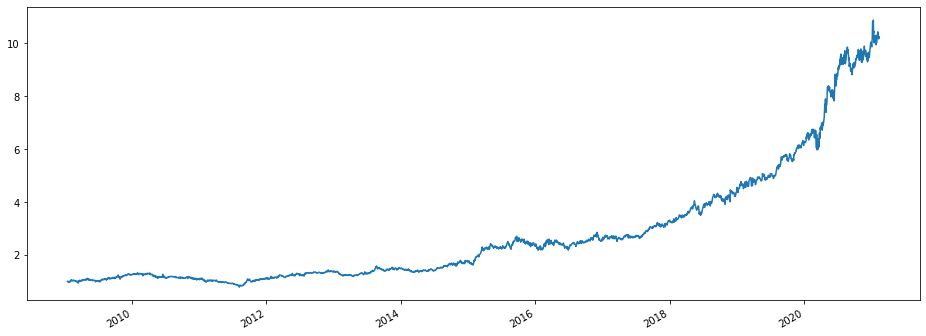

In [399]:
vol_weighted_weights_2x = pf.vol_weighted_weights(rets_2,look_back_days=30,reb_days=30,leverage=2)
vol_weighted_returns_2x = pf.strategy_returns(rets_2,vol_weighted_weights_2x)
vol_performance_2x = pf.performance_index(vol_weighted_returns_2x)
vol_performance_2x.plot(figsize=(16,6));

##### Plot Weights:

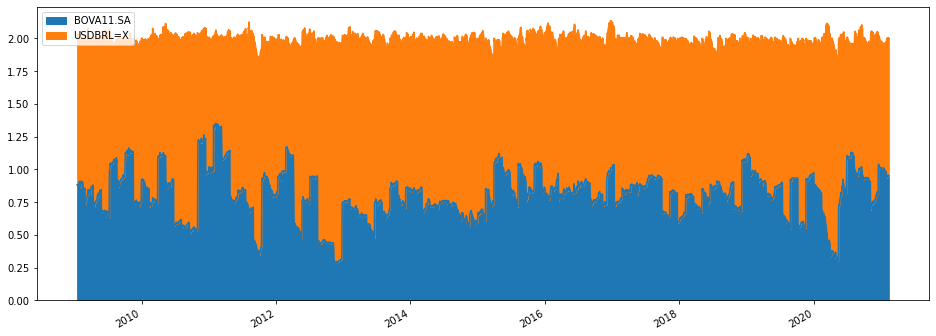

In [400]:
pf.plot_weights(vol_weighted_weights_2x)

##### Portfolio Stats:

In [401]:
pf.main_stats(vol_weighted_returns_2x)

,Annualized Return,Annualized Volatility,Sharpe Ratio (rf=0),Maximum Drawdown,Historical VaR (5.0%),Historical CVaR (5.0%),Gaussian VaR (5.0%),Modified VaR (5.0%),Kurtosis,Skewness,Normality
stats,0.212863,0.258112,0.824695,-0.401851,-0.024906,-0.035871,-0.025842,-0.024179,5.846256,0.156253,False


##### Yearly Returns:

In [402]:
pf.rets_yearly_returns(vol_weighted_returns_2x)

2009    25.70
2010   -13.11
2011     1.71
2012    22.23
2013     9.69
2014    19.77
2015    31.21
2016    11.02
2017    26.29
2018    33.04
2019    40.71
2020    61.94
2021     3.02
dtype: float64

#### FED Funds Data:

In [403]:
pf.get_fedfunds(start_date="2010-01-01",end_date="2021-01-01")

,Value
Date,
2010-01-01,0.11
2010-02-01,0.13
2010-03-01,0.16
2010-04-01,0.20
2010-05-01,0.20
...,...
2020-09-01,0.09
2020-10-01,0.09
2020-11-01,0.09


#### Moving window volatility and returns plot:

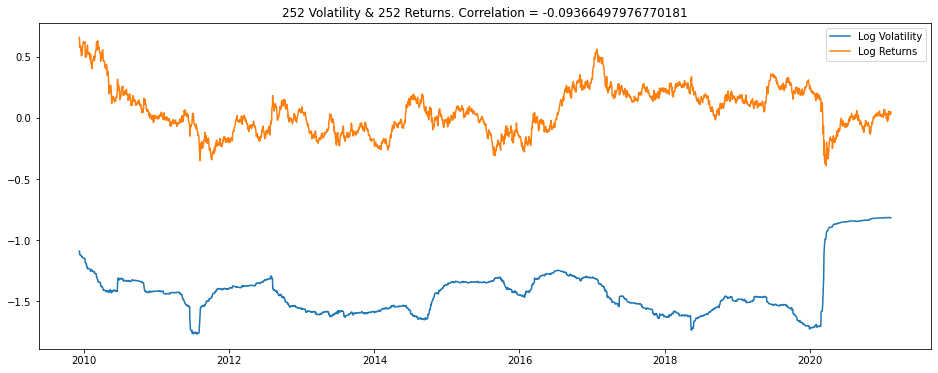

In [430]:
pf.plot_log_vol_rets(rets["BOVA11.SA"],window=252)

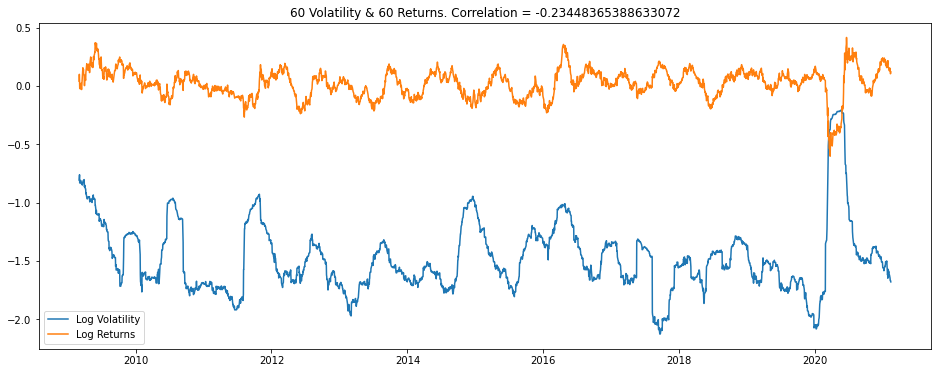

In [431]:
pf.plot_log_vol_rets(rets["BOVA11.SA"],window=60)

#### Autocorrelation in returns plots:

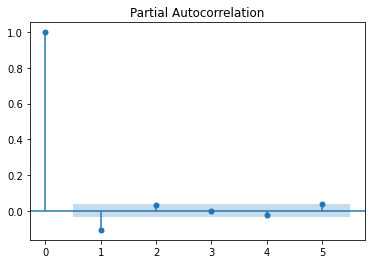

In [437]:
pf.plot_rets_autocorr(rets["BOVA11.SA"],lags=5);

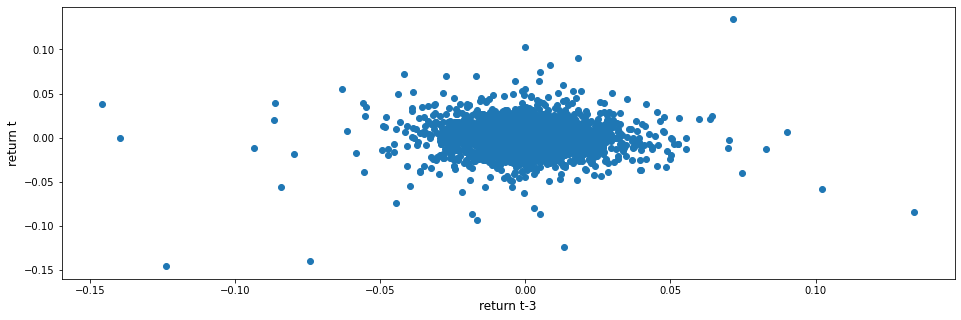

In [452]:
pf.plot_rets_scatter(rets["BOVA11.SA"],lag=3)

#### Linear Regression:

In [460]:
pf.linear_regression(rets[["SMAL11.SA","USDBRL=X"]],rets["BOVA11.SA"]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BOVA11.SA   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     2060.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        09:50:27   Log-Likelihood:                 9546.9
No. Observations:                3069   AIC:                        -1.909e+04
Df Residuals:                    3066   BIC:                        -1.907e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.724e-05      0.000     -0.140      0.889      -0.000       0.000
SMAL11.SA      0.8045      0.013     62.178      0.000       0.779       0.830
USDBRL=X      -0.0427      0.018     -2.367      0.018      -0.078      -0.007
==============================================================================
Omnibus:                      412.496   Durbin-Watson:                   2.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5206.385
Skew:                           0.052   Prob(JB):                         0.00
Kurtosis:                       9.380   Cond. No.                         94.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""